<a href="https://www.kaggle.com/code/hilalalpak/armut-association-rule-based-recommender-system?scriptVersionId=182448993" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#6EBF5C; padding: 6px; margin-bottom: 10px;">
    <blockquote style="border-left: 5px solid #FFA500;"> 
    <p style="margin: 0; font-size: 25px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px;">Association Rule Based Recommender System</p>  
    </blockquote>
</div>


<div class="center">
    <img src="https://muraterdor.com/wp-content/uploads/2019/12/396_muraterdor.com_.jpg" alt="396_muraterdor.com" style="width: 50%; height: auto;">
</div>
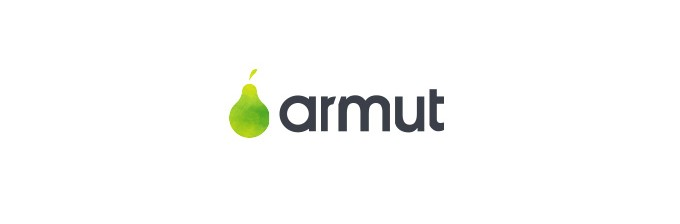

<div style="display:inline-block; text-align:left; margin-bottom:10px;">
    <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color: #2f3c54;">
        <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;">
            <p style="font-weight:bold; color:white; margin:0; font-size: 140%;font-family: Arial, sans-serif">Business Problem:</p>
        </blockquote>
        <div style="margin-bottom: 10px;">
            <p style="color:white; font-size: 100%; font-family: Arial, sans-serif; margin-top:5px;">Armut is one of the leading online service platforms in Turkey. It connects users with service providers offering various services such as cleaning, renovation, and moving. Armut's platform enables users to easily access services with just a few taps on their computer or smartphone. By utilizing data on the categories of services users have received and the service providers, we aim to create a product recommendation system using the Association Rule Learning method.
            </p>
        </div>
        <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
            <span style="font-weight:bold; font-size: 100%; color:white;">Dataset Overview: </span>
            <span style="color:white;">The dataset contains information about the services customers have received, including the categories of these services, as well as the date and time for each service.</span>
        </blockquote> 
        <div style="border: 2px solid #333333; border-radius: 0 50px 0 0; padding: 10px; margin-bottom: 10px; background-color:#414F74;">
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- User ID:</span>
                <span style="color:white;">Unique customer number</span>
            </div>
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- ServiceId:</span>
                <span style="color:white;">Anonymous services for each category. (Example: Under the Cleaning category, there is a service for sofa cleaning.)</span>
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- CategoryId:</span>
                <span style="color:white;">Anonymous categories. (Example: Cleaning, moving, renovation categories)</span>
            </div>
            <div style="margin-bottom: 10px;">
                <span style="font-weight:bold; color:white;">- CreateDate:</span>
                <span style="color:white;">The date the service was purchased.</span>
            </div>
        </div>
    </div>
</div>


In [1]:
import sys
import subprocess

def install_package(package):
    process = subprocess.Popen([sys.executable, '-m', 'pip', 'install', package],
                               stdout=subprocess.PIPE,
                               stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    if process.returncode != 0:
        print(f"Error occurred while installing {package}:")
        print(stderr.decode('utf-8'))

install_package('mlxtend')

In [2]:
# Import Required Libraries

import pandas as pd
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from mlxtend.frequent_patterns import apriori, association_rules

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)

<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#a6e6a6; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px; color: black; ">🍐 Overview & Preprocessing</p> 
</div>

In [3]:
df = pd.read_csv("/kaggle/input/armut-dataset/armut_data.csv")

In [4]:
def check_df(dataframe, head=5):
    print("SHAPE".center(70,"-"))
    print(dataframe.shape)
    print("INFO".center(70,"-"))
    print(dataframe.info())
    print("NUNIQUE".center(70,"-"))
    print(dataframe.nunique())
    print("MISSING VALUES".center(70,"-"))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70,"-"))
    print(dataframe.duplicated().sum())
    
    
check_df(df)

--------------------------------SHAPE---------------------------------
(162523, 4)
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162523 entries, 0 to 162522
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserId      162523 non-null  int64 
 1   ServiceId   162523 non-null  int64 
 2   CategoryId  162523 non-null  int64 
 3   CreateDate  162523 non-null  object
dtypes: int64(3), object(1)
memory usage: 5.0+ MB
None
-------------------------------NUNIQUE--------------------------------
UserId         24826
ServiceId         50
CategoryId        12
CreateDate    117510
dtype: int64
----------------------------MISSING VALUES----------------------------
UserId        0
ServiceId     0
CategoryId    0
CreateDate    0
dtype: int64
--------------------------DUPLICATED VALUES---------------------------
0


In [5]:
df.head(10)

,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00
5,14354,15,1,2017-08-06 16:27:00
6,14162,21,5,2017-08-06 16:28:00
7,21230,46,4,2017-08-06 16:34:00
8,25446,6,7,2017-08-06 16:39:00
9,10659,4,5,2017-08-06 16:44:00


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserId,162523.0,13089.803862,7325.816060,0.0,6953.0,13139.0,19396.0,25744.0
ServiceId,162523.0,21.641140,13.774405,0.0,13.0,18.0,32.0,49.0
CategoryId,162523.0,4.325917,3.129292,0.0,1.0,4.0,6.0,11.0


<div style="background-color: #2f3c54; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Create a variable that combines ServiceID and CategoryID to represent a different service for each category.</p>
    </blockquote>
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Define the basket description based on the services each customer avails monthly, and utilize this in Association Rule Learning (ARL) calculations.</p>
    </blockquote>
</div>

In [7]:
df["Service"] = df.apply(lambda x: f"{x['ServiceId']}_{x['CategoryId']}", axis=1)
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


In [8]:
# First, create a new date variable containing only the year and month

df['CreateDate'] = pd.to_datetime(df['CreateDate'])
df["New_Date"] = df['CreateDate'].dt.to_period('M')
df.head()

,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08


In [9]:
df["BasketId"] = df.apply(lambda x: f"{x['UserId']}_{x['New_Date']}", axis=1)

In [10]:
df.head(10)

,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date,BasketId
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08
5,14354,15,1,2017-08-06 16:27:00,15_1,2017-08,14354_2017-08
6,14162,21,5,2017-08-06 16:28:00,21_5,2017-08,14162_2017-08
7,21230,46,4,2017-08-06 16:34:00,46_4,2017-08,21230_2017-08
8,25446,6,7,2017-08-06 16:39:00,6_7,2017-08,25446_2017-08
9,10659,4,5,2017-08-06 16:44:00,4_5,2017-08,10659_2017-08


<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#a6e6a6; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 20px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px; color: black; ">🍐 ARL</p> 
</div>

<div style="background-color: #2f3c54; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">ARL is a technique used to identify patterns and relationships in customers' shopping habits. This table can be used to determine which services customers purchase together and which combinations are more common. For example, it can be used to identify relationships such as the likelihood of a customer purchasing a specific service when they have already purchased another service.</p>
    </blockquote>
</div>



In [11]:
invoice_service = df.groupby(['BasketId', 'Service'])["CategoryId"].count().unstack().\
                    fillna(0).applymap(lambda x: 1 if x > 0 else 0)
    

invoice_service.head(10).style.background_gradient(axis=0, cmap='summer')

Service,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10000_2017-12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10000_2018-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10001_2018-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


<div style="background-color: #2f3c54; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">The code above creates a table that represents the services purchased by each customer in their shopping baskets. It determines which services are purchased for each basket and transforms this information into a table.</p>
    </blockquote>
        <p style="margin: 0; font-size: 12px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">Each cell takes a value indicating whether that basket contains the respective service (1: contains, 0: does not contain).</p>
</div>




In [12]:
# These codes utilize the Apriori algorithm to identify frequent itemsets in the dataset and 
# generate rules from these sets, which are derived from frequent itemsets meeting a specific support level.

frequent_itemsets = apriori(invoice_service, min_support=0.01, use_colnames=True) 
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [13]:
rules.sort_values(by="support", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,0.018191,1.209066,0.609539
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,0.018191,1.188833,0.616073
12,(22_0),(2_0),0.047515,0.130286,0.016568,0.348700,2.676409,0.010378,1.335350,0.657611
13,(2_0),(22_0),0.130286,0.047515,0.016568,0.127169,2.676409,0.010378,1.091260,0.720197
14,(2_0),(25_0),0.130286,0.042895,0.013437,0.103136,2.404371,0.007849,1.067168,0.671590
15,(25_0),(2_0),0.042895,0.130286,0.013437,0.313257,2.404371,0.007849,1.266432,0.610268
0,(2_0),(13_11),0.130286,0.056627,0.012819,0.098394,1.737574,0.005442,1.046325,0.488074
1,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,0.005442,1.124216,0.449965
4,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,0.007929,1.493211,0.725728
5,(15_1),(33_4),0.120963,0.027310,0.011233,0.092861,3.400299,0.007929,1.072262,0.803047


<div style="color: #ffffff; border-radius: 0 50px 0 20px; background-color:#a6e6a6; padding: 8px; margin-bottom: 10px;"> 
    <p style="margin: 0; font-size: 15px; text-align: center; font-family: Arial, sans-serif; font-weight: bold; letter-spacing: 2px; color: black; ">🍐 Service recommendations to users during shopping</p> 
</div>

In [14]:
def arl_recommender(rules_df, service, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, srv in enumerate(sorted_rules["antecedents"]):
        for j in list(srv):
            if j == service:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

<div style="background-color:#B2DF8A; border-radius: 10px; padding: 8px; margin-bottom: 6px; text-align: right;">
    <blockquote style="border-left: 5px solid #FFA500; padding-left: 10px;"> 
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #000000;">This function is designed to analyze the shopping habits of users on the Armut website. It creates rules to identify preferred services by users and provides recommendations for specific services. </p>
    </blockquote>
        <p style="margin: 0; font-size: 12px; text-align: left; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #000000;">The recommended services are based on other services purchased by users in their shopping baskets. This way, users are offered relevant services they may be interested in and likely to purchase.</p>
</div>

<div style="background-color: #808080; border-radius: 10px; padding: 3px; margin-bottom: 6px; text-align: right;">
        <p style="margin: 0; font-size: 20px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;">🌟 Thank you for taking the time to review my project. Your feedback and comments are extremely valuable for improving my projects.</p>
<p style="margin: 0; font-size: 12px; text-align: center; font-family: 'Arial', sans-serif; font-weight: bold; letter-spacing: 1px; color: #ffffff;"> Please feel free to share your thoughts and suggestions with me 💬</p>
</div>